In [3]:
import numpy as np

import scipy as sp
import scipy.stats

from optimizers import *
from exp_family import *
from projectors import *

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
def _dot(a, b):
    return sum(np.inner(x.ravel(), y.ravel()) for x, y in zip(a, b))


## Бублик

In [5]:
#obj = lambda x: sp.stats.multivariate_normal.pdf(x, mean=[0, 0], cov=np.diag([1, 1]))
obj = lambda x: 1 <= _dot(x, x) <= 4

In [8]:
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(1, 15))
thetas, estimations = projected_gradient(obj, GaussianDistribution, projector, 
                                         1e-5, (np.array([0, 0]), np.eye(2)), n_iters=10 ** 4)

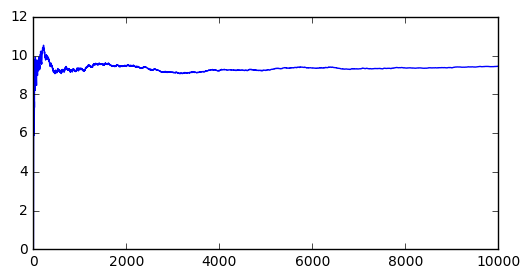

In [9]:
plt.figure(figsize=(6, 3))
plt.plot(np.array(estimations))

Довольно хорошо сходится.

## Эллипс

In [14]:
np.random.seed(42)
A = np.random.rand(2, 2) + 0.4 * np.eye(2)
obj = lambda x: np.inner(x, np.dot(A, x)) <= 4

In [15]:
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(1, 15))
thetas, estimations = projected_gradient(obj, GaussianDistribution, projector, 
                                         1e-2, (np.array([0, 0]), np.eye(2)), n_iters=10 ** 4)

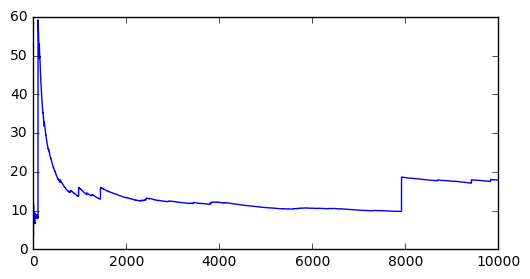

In [16]:
plt.figure(figsize=(6, 3))
plt.plot(np.array(estimations))

## Mirror descent

In [17]:
obj = lambda x: 1 <= _dot(x, x) <= 4

In [18]:
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(1, 15))
thetas, estimations = mirror_update(obj, GaussianDistribution, mirror, 
                                         1e-6, theta0 = (np.array([0, 0]), np.eye(2)), n_iters=10 ** 4)

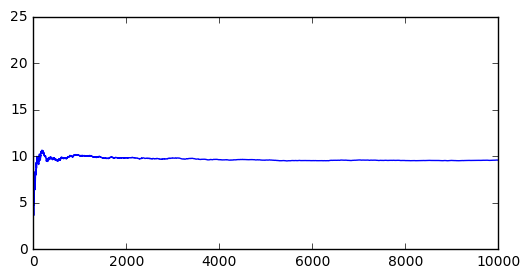

In [19]:
plt.figure(figsize=(6, 3))
plt.plot(np.array(estimations))

In [20]:
estimations[-1]

9.6034174114208

Тоже сойдет.